<a href="https://colab.research.google.com/github/RezaBahani/IUTComputationalPhysics/blob/main/Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def gaussian(E,mean , sigma, error):
  ret = np.exp(-(E - mean)**2 / (2 * sigma**2))

  if error != 0:
    errors = np.random.normal(0, error, E.shape)
    ret += ret * errors

  return ret

In [ ]:
E = np.linspace(- 5, 5, 20)
means = np.linspace(-1, 1, 50)
sigmas = np.linspace(0.1, 2, 100)

E_, means_, sigmas_ = np.meshgrid(E, means, sigmas)
allYs = gaussian(E_, means_, sigmas_, 0)



In [ ]:
data = gaussian(E, 0, 1, 0.1)
exprimentNew = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis = 0)
exprimentNew = np.repeat(exprimentNew, sigmas.size, axis = 2)


chi2 = np.sum((exprimentNew - allYs)**2, 1)

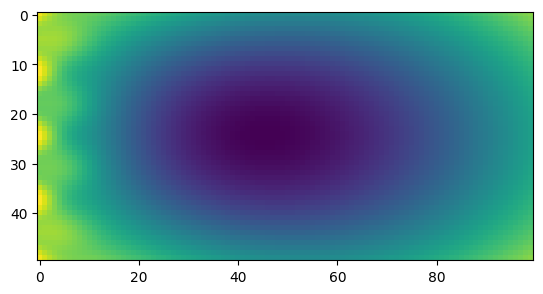

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


plt.imshow(chi2)

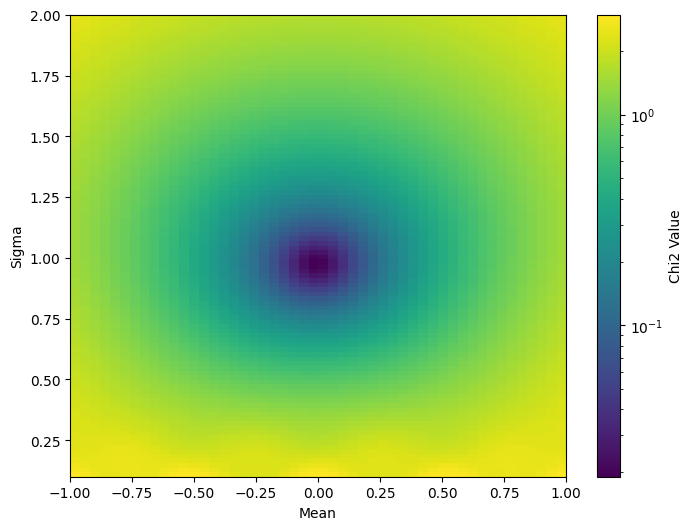

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


#chi2[chi2 > 5] = 5 #برای اجتناب از کشیده شدن مقادیر بسیار زیاد در پلات
plt.figure(figsize=(8, 6))
plt.imshow(np.transpose(chi2), aspect='auto', origin='lower',
           extent=[means[0], means[-1], sigmas[0], sigmas[-1]],
           cmap='viridis', norm=LogNorm())
plt.colorbar(label='Chi2 Value')
plt.xlabel('Mean')
plt.ylabel('Sigma')
plt.show()

In [ ]:
min_args = np.unravel_index( np.argmin(chi2) , chi2.shape )
print( f'χ² is minimized at μ={means[min_args[0]]:.2f} and σ={sigmas[min_args[1]]:.2f}' )

χ² is minimized at μ=-0.02 and σ=0.98


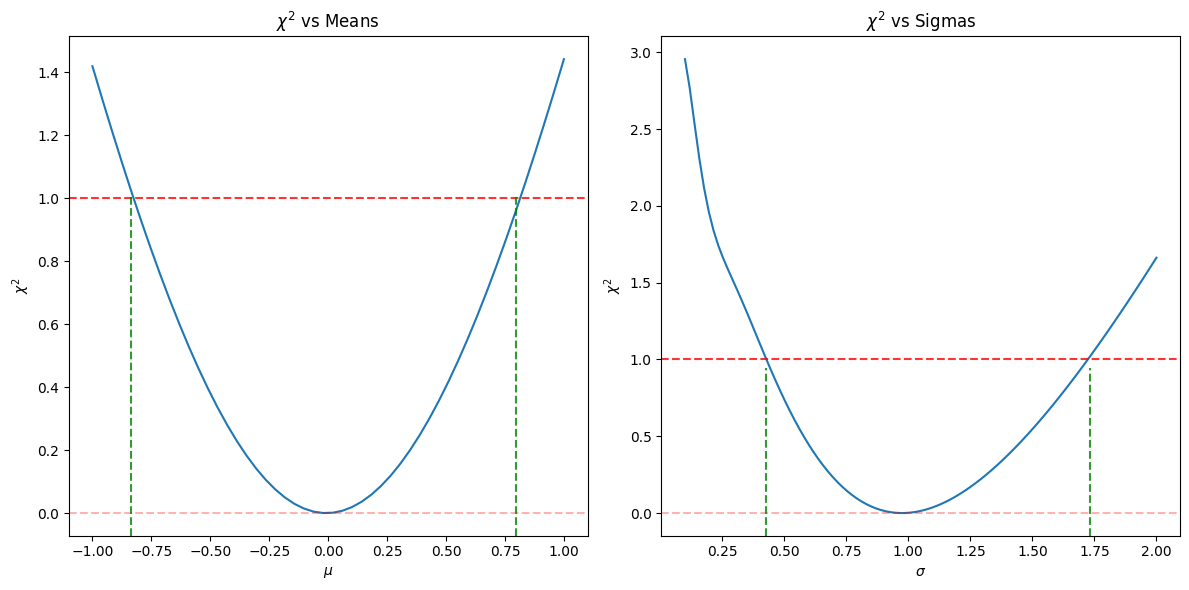

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))


minchi2 = np.min(chi2[ : , min_args[1] ])
ax0.plot(means , chi2[ : , min_args[1] ] - minchi2 )
ax0.set_title(r"$\chi^2$ vs Means")
ax0.set_xlabel(r"$\mu$")
ax0.set_ylabel(r"$\chi^2$")
ax0.axhline(1 , color='red', linestyle='--' , alpha=0.8)
ax0.axhline(0 , color='red', linestyle='--' , alpha=0.3)

intersects = means[ np.argsort(np.abs(chi2[ : , min_args[1] ] - 1- minchi2 ))[[0,1]] ]
ax0.axvline( intersects[0]  , ymax=1./np.max(chi2[: , min_args[1]  ]) , color='green', linestyle='--' , alpha=0.8)
ax0.axvline( intersects[1]  , ymax=1./np.max(chi2[: , min_args[1]  ]) , color='green', linestyle='--', alpha=0.8)

minchi2 = np.min(chi2[ min_args[0] , : ])
ax1.plot(sigmas , chi2[ min_args[0] , : ] - minchi2)
ax1.set_title(r"$\chi^2$ vs Sigmas")
ax1.set_xlabel(r"$\sigma$")
ax1.set_ylabel(r"$\chi^2$")
ax1.axhline(1 , color='red', linestyle='--', alpha=0.8)
ax1.axhline(0 , color='red', linestyle='--' , alpha=0.3)

intersects = sigmas[ np.argsort(np.abs(chi2[ min_args[0] , : ] - 1 - minchi2 ))[[0,1]] ]
ax1.axvline( intersects[0]  , ymax=1./np.max(chi2[ min_args[0] , : ]) , color='green', linestyle='--', alpha=0.8)
ax1.axvline( intersects[1]  , ymax=1./np.max(chi2[ min_args[0] , : ]) , color='green', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()

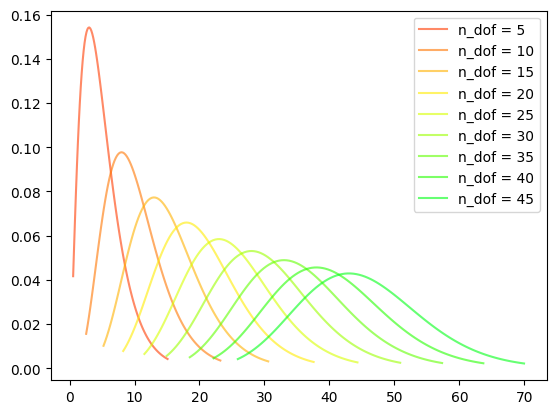

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

for df in range(5 , 50 , 5):
    x = np.linspace(chi2.ppf(0.01, df),
                    chi2.ppf(0.99, df), 100)
    ax.plot(x, chi2.pdf(x, df),
        color=plt.colormaps['hsv'](df*2) , alpha=0.6, label=f'n_dof = {df}')

plt.legend()
plt.show()

Fitted Parameters: β = 0.001, α = 1.047


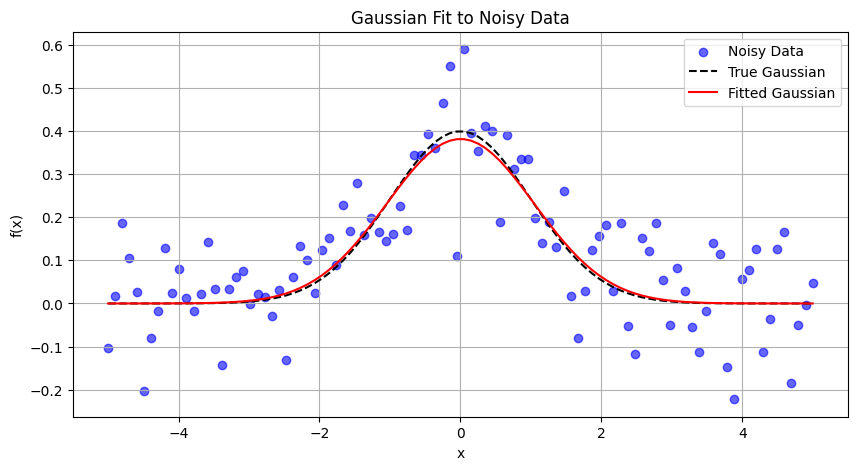


Validation after 100 iterations:
β mean: 0.010 ± 0.078
α mean: 0.997 ± 0.072


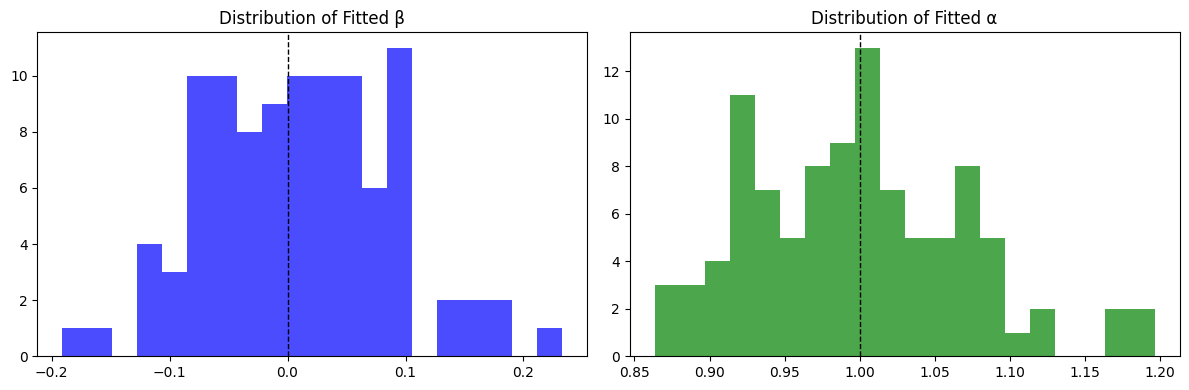

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Define the Gaussian function
def gaussian(x, beta, alpha):
    return (1 / (alpha * np.sqrt(2 * np.pi))) * np.exp(-(x - beta)**2 / (2 * alpha**2))

# 2. Generate synthetic data with noise
x_data = np.linspace(-5, 5, 100)
true_beta, true_alpha = 0, 1
y_data = gaussian(x_data, true_beta, true_alpha) + 0.1 * np.random.randn(100)

# 3. Fit the Gaussian to the noisy data
params, covariance = curve_fit(gaussian, x_data, y_data, p0=[0, 1])
beta_fit, alpha_fit = params
print(f"Fitted Parameters: β = {beta_fit:.3f}, α = {alpha_fit:.3f}")

# 4. Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, label="Noisy Data", color="blue", alpha=0.6)
plt.plot(x_data, gaussian(x_data, true_beta, true_alpha), 'k--', label="True Gaussian")
plt.plot(x_data, gaussian(x_data, *params), 'r-', label="Fitted Gaussian")
plt.title("Gaussian Fit to Noisy Data")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Repeat the experiment to validate robustness
n_iterations = 100
betas, alphas = [], []

for _ in range(n_iterations):
    y_data = gaussian(x_data, true_beta, true_alpha) + 0.1 * np.random.randn(100)
    params, _ = curve_fit(gaussian, x_data, y_data, p0=[0, 1])
    betas.append(params[0])
    alphas.append(params[1])

print(f"\nValidation after {n_iterations} iterations:")
print(f"β mean: {np.mean(betas):.3f} ± {np.std(betas):.3f}")
print(f"α mean: {np.mean(alphas):.3f} ± {np.std(alphas):.3f}")

# 6. Plot distribution of fitted parameters
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(betas, bins=20, color="blue", alpha=0.7)
plt.axvline(true_beta, color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of Fitted β")

plt.subplot(1, 2, 2)
plt.hist(alphas, bins=20, color="green", alpha=0.7)
plt.axvline(true_alpha, color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of Fitted α")
plt.tight_layout()
plt.show()